# Evaluation Metrics for Classification

## Evaluation metrics: session overview

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [7]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [8]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## Accuracy and dummy model

In [10]:
len(y_val)

1409

In [11]:
(y_val==churn_decision).mean()

0.8034066713981547

In [12]:
1132/1409

0.8034066713981547

In [13]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)

scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = accuracy_score(y_val, churn_decision)
    print(f'{t:.2f} {score:2f}')
    scores.append(score)

0.00 0.273953
0.05 0.508872
0.10 0.591199
0.15 0.666430
0.20 0.709723
0.25 0.738822
0.30 0.760114
0.35 0.772179
0.40 0.784954
0.45 0.793471
0.50 0.803407
0.55 0.801278
0.60 0.794890
0.65 0.786373
0.70 0.765791
0.75 0.744500
0.80 0.734564
0.85 0.726047
0.90 0.726047
0.95 0.726047
1.00 0.726047


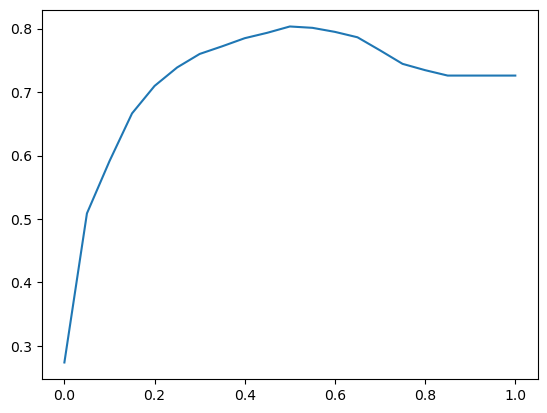

In [14]:
plt.plot(thresholds, scores)

In [15]:
from collections import Counter

In [16]:
Counter(y_pred>=1.0)

Counter({False: 1409})

In [17]:
1- y_val.mean()

0.7260468417317246

## Confusion table

In [18]:
actual_positive = y_val == 1
actual_negative = y_val == 0

In [19]:
T = .5
predict_positive = y_pred >= T
predict_negative = y_pred < T

In [20]:
tp = (actual_positive & predict_positive).sum()
tp

210

In [21]:
tn = (actual_negative & predict_negative).sum()
tn

922

In [22]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [23]:
confusion_matrix = np.array([[tn, fp], 
                             [fn, tp]])

confusion_matrix

array([[922, 101],
       [176, 210]])

In [24]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [25]:
acc = 0.65 + 0.15
print(acc)

0.8


## Precision and Recall

In [26]:
(tp + tn)/(tp+fp+tn+fn)

0.8034066713981547

Precision

![Alt text](./images/precision.png)

In [27]:
precision = tp / (tp+fp)


print(f'{precision=:.2f}')

precision=0.68


Recall

![Alt text](./images/recall.png)

In [28]:
recall = tp / (tp+fn)
print(f'{recall=:.2f}')

recall=0.54


## ROC Curves

### TPR and FPR 

In [29]:
tpr = tp / (tp+fn)
tpr

0.5440414507772021

In [30]:
recall

0.5440414507772021

In [31]:
0.5440414507772021

0.5440414507772021

In [32]:
fpr = fp / (tn+fp)
fpr

0.09872922776148582

In [33]:
thresholds = np.linspace(0, 1, 101)
scores = []
for t in thresholds:
    predict_positive = y_pred >= t
    predict_negative = y_pred < t
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, tn, fp, fn))

In [34]:
scores_df = pd.DataFrame(scores, columns=['threshold', 'tp', 'tn', 'fp', 'fn'])

scores_df['fpr'] = scores_df.fp/(scores_df.fp + scores_df.tn)
scores_df['tpr'] = scores_df.tp/(scores_df.tp + scores_df.fn) # Similar to recall

In [35]:
scores_df

,threshold,tp,tn,fp,fn,fpr,tpr
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,385,110,913,1,0.892473,0.997409
2,0.02,384,193,830,2,0.811339,0.994819
3,0.03,383,257,766,3,0.748778,0.992228
4,0.04,381,308,715,5,0.698925,0.987047
...,...,...,...,...,...,...,...
96,0.96,0,1023,0,386,0.000000,0.000000
97,0.97,0,1023,0,386,0.000000,0.000000
98,0.98,0,1023,0,386,0.000000,0.000000
99,0.99,0,1023,0,386,0.000000,0.000000


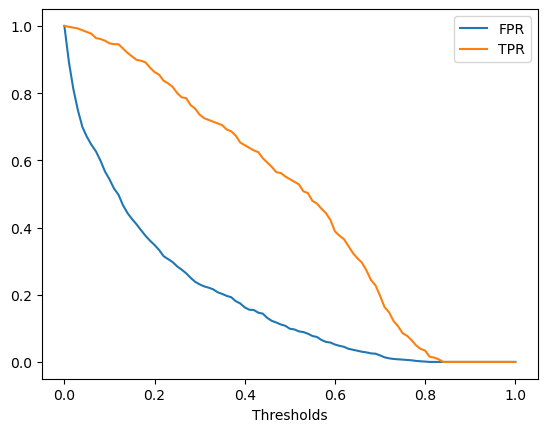

In [36]:
def plot_roc_curve(dataframe, color=None):
    plt.plot(dataframe.threshold, dataframe.fpr, label='FPR', color=color)
    plt.xlabel('Thresholds')
    plt.plot(dataframe.threshold, dataframe.tpr, label='TPR', color=color)
    plt.legend()

plot_roc_curve(scores_df)

### Random model

In [37]:
y_rand = np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [38]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

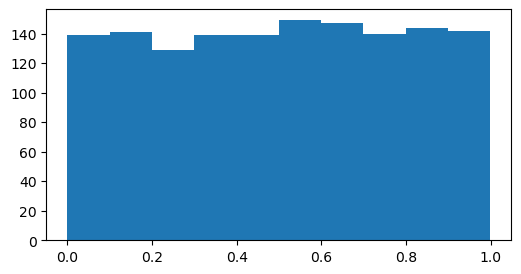

In [39]:
plt.figure(figsize=(6,3))
plt.hist(y_rand, bins=10)
plt.show()

In [40]:
((y_rand>=0.5) == y_val).mean()

0.5017743080198722

In [41]:
def get_tpr_fpr_dataframe(y_val, y_pred):

    thresholds = np.linspace(0, 1, 101)
    scores = []

    for t in thresholds:
        actual_positive = y_val == 1
        actual_negative = y_val == 0

        predict_positive = y_pred >= t
        predict_negative = y_pred < t

        tp = (actual_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, tn, fp, fn))

    scores_df = pd.DataFrame(scores, columns=['threshold', 'tp', 'tn', 'fp', 'fn'])

    scores_df['fpr'] = scores_df.fp/(scores_df.fp + scores_df.tn)
    scores_df['tpr'] = scores_df.tp/(scores_df.tp + scores_df.fn)

    return scores_df

In [42]:
tpr_fpr_dataframe = get_tpr_fpr_dataframe(y_val, y_rand)

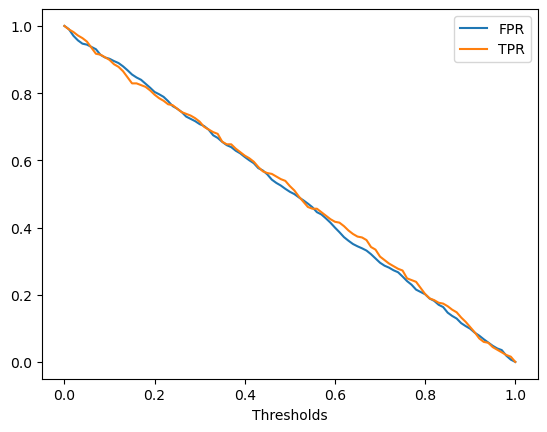

In [43]:
plot_roc_curve(tpr_fpr_dataframe)

### Ideal model

In [44]:
num_neg = (y_val==0).sum()
num_pos = (y_val==1).sum()
num_neg, num_pos

(1023, 386)

In [45]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [47]:
(y_ideal_pred<=0.5).sum(), (y_ideal_pred>0.5).sum()

(705, 704)

In [48]:
1-(y_val==1).mean()

0.7260468417317246

In [49]:
((y_ideal_pred>=0.726) == y_ideal).mean()

1.0

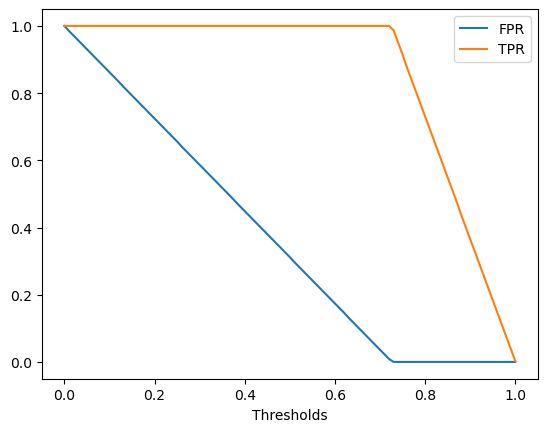

In [50]:
df_ideal = get_tpr_fpr_dataframe(y_ideal, y_ideal_pred)
plot_roc_curve(df_ideal)

### Putting everything together

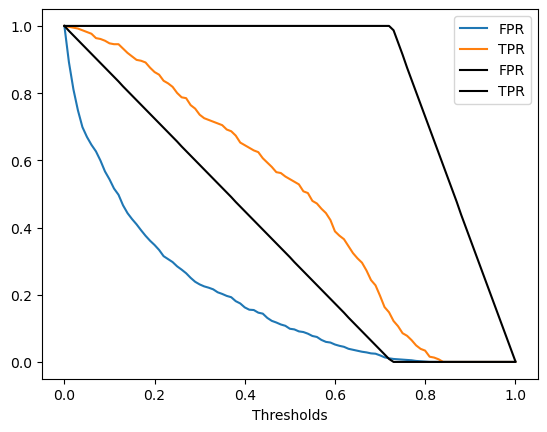

In [51]:
plot_roc_curve(scores_df)

plot_roc_curve(df_ideal, color='black')

Text(0, 0.5, 'TPR')

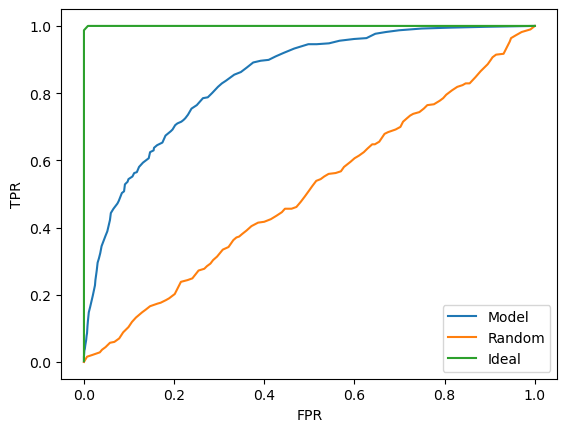

In [52]:
plt.plot(scores_df.fpr, scores_df.tpr, label='Model')
plt.plot(tpr_fpr_dataframe.fpr, tpr_fpr_dataframe.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')

In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

Text(0, 0.5, 'TPR')

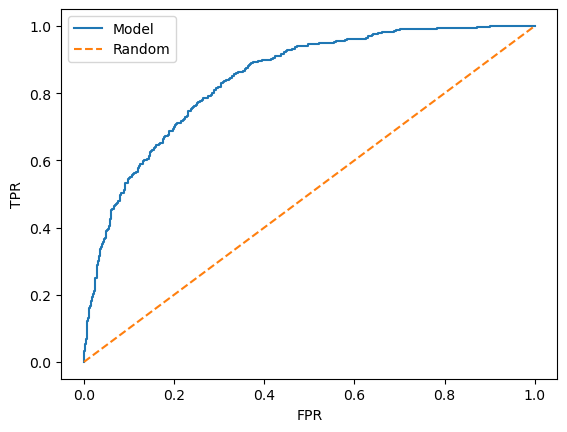

In [55]:
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], linestyle='--', label='Random')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')

## ROC AUC

In [56]:
from sklearn.metrics import auc

In [57]:
auc(fpr, tpr)

0.8438530381535563

In [58]:
auc(scores_df.fpr, scores_df.tpr)

0.8438732975754537

In [59]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438530381535563

In [62]:
roc_auc_score(y_val, y_pred)

0.8438530381535563

## Cross-Validation

In [82]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical+numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    return dv, model

In [64]:
dv, model = train(df_train, y_train)

In [65]:
def predict(df, dv, model):
    dicts = df[categorical+numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [66]:
y_pred = predict(df_val, dv, model)

In [67]:
from sklearn.model_selection import KFold

In [68]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [69]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [70]:
len(train_idx), len(val_idx)

(5070, 564)

In [71]:
len(df_full_train)

5634

In [72]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [104]:
from tqdm.auto import tqdm

for C in [0.01, 0.001, 0.1, 0.5, 1, 5, 10]:

    scores= []
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.churn
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        roc_auc = roc_auc_score(df_val.churn, y_pred)
        scores.append(roc_auc)
    
    print(f'{C=} {np.mean(scores):.3f} +- {np.std(scores):.3f}') 







5it [00:01,  4.10it/s]


C=0.01 0.840 +- 0.009








5it [00:01,  3.84it/s]


C=0.001 0.825 +- 0.009








5it [00:01,  3.32it/s]


C=0.1 0.841 +- 0.008








5it [00:01,  3.40it/s]


C=0.5 0.840 +- 0.007








5it [00:01,  3.93it/s]


C=1 0.841 +- 0.008








5it [00:01,  3.41it/s]


C=5 0.841 +- 0.007








5it [00:01,  3.48it/s]

C=10 0.841 +- 0.007


In [103]:
scores

[0.8423161761819907,
 0.8458296086611046,
 0.8325105358217941,
 0.8326065581633305,
 0.8509499231276082]

In [110]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8572386167896259
